In [1]:
import numpy as np
from empiricaldist import Pmf
import pandas as pd
from scipy.stats import norm, binom

In [3]:
# best 3 out of 4 problem
d6 = Pmf(1/6, range(1, 6+1))

<Axes: >

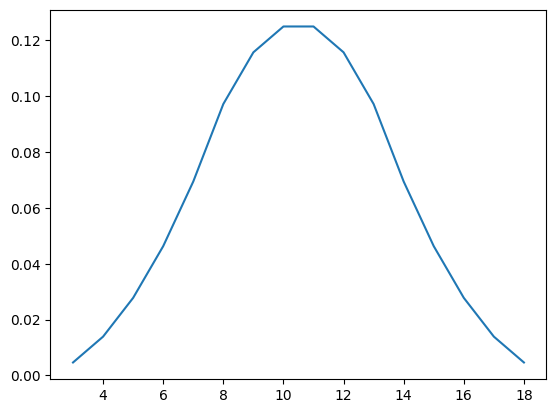

In [5]:
d6_3 = Pmf.add_dist(d6, Pmf.add_dist(d6, d6))
d6_3.plot()

<Axes: >

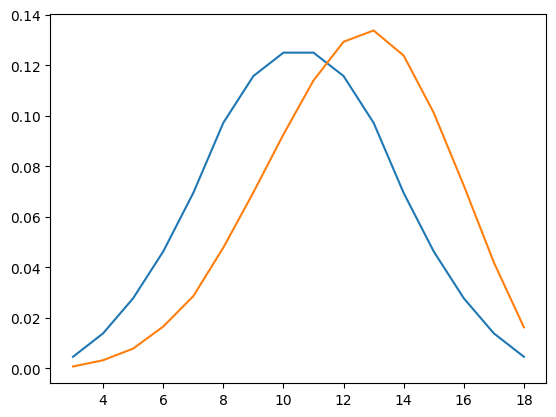

In [10]:
a = np.random.randint(1, 7, size=(100000, 4))
a.sort(axis=1)
t = a[:, 1:].sum(axis=1)
d6_best_3_of_4 = Pmf.from_seq(t)
d6_3.plot()
d6_best_3_of_4.plot()

<Axes: >

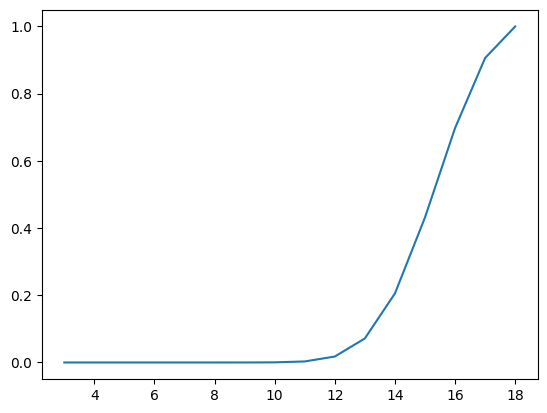

In [12]:
# max of six best3
cdf_best3 = d6_best_3_of_4.make_cdf() ** 6
cdf_best3.plot()

(12.0, 12.251719999999999)
(2.3804761428476167, 2.8490695045224856)
0.0571
0.23184


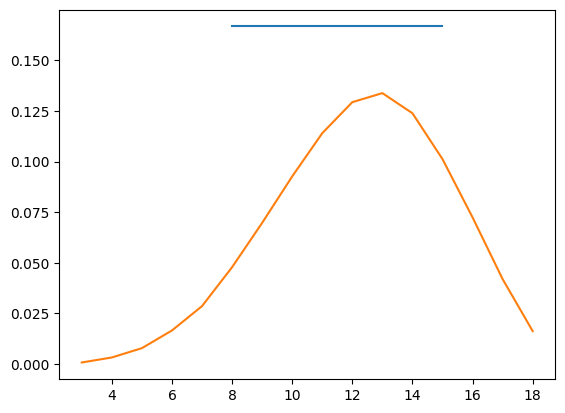

In [14]:
# dnd "standard array" problem
preset = Pmf(1/6, [8, 10, 12, 13, 14, 15])
preset.plot()

best3 = d6_best_3_of_4
best3.plot()

# mean
print((preset.mean(), best3.mean()))

# std deviation
print((preset.std(), best3.std()))

# prob of getting less than 8
print(best3.prob_lt(8))

# prob of getting more than 15
print(best3.prob_ge(15))

In [31]:
# dnd fight moster problem
def make_die(n):
    faces = range(1, n+1)
    pmf = Pmf(1/n, faces)
    return pmf

def mix(prior, pmfs):
    df = pd.DataFrame(pmfs).fillna(0).transpose()
    df *= np.array(prior)
    return Pmf(df.sum(axis=1))

prior = Pmf(1/3, ["d6", "d8", "d10"])
likelihood = [1/6, 1/8, 1/10]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
d6,0.425532
d8,0.319149
d10,0.255319


<Axes: >

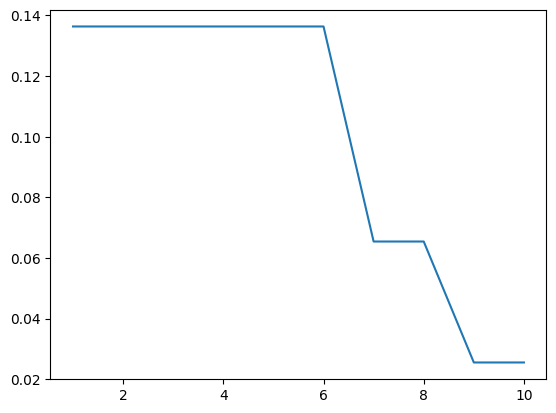

In [32]:
damage = mix(posterior, [make_die(6), make_die(8), make_die(10)])
damage.plot()

In [33]:
damage[6]

0.13634751773049647

<Axes: >

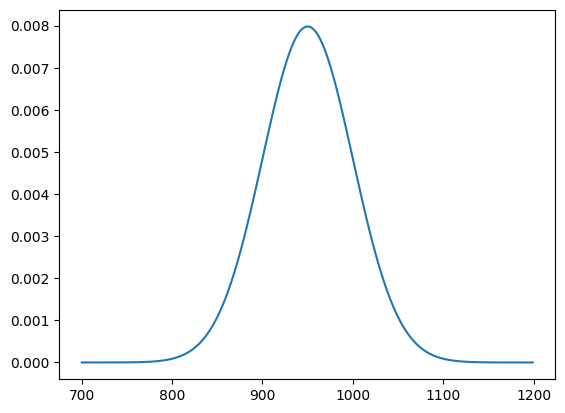

In [63]:
# poincare v baker problem
dist = norm(950, 50)
weights = np.arange(700, 1200)
pmf = Pmf(dist.pdf(weights), weights)
pmf.normalize()
pmf.plot()

heft 1 loaves, prob < 1000 is  0.8437565996296369
heft 2 loaves, prob < 1000 is  0.7119251994185674
heft 3 loaves, prob < 1000 is  0.6006915854520616
heft 4 loaves, prob < 1000 is  0.5068374895671669
heft 5 loaves, prob < 1000 is  0.4276474767620143
heft 6 loaves, prob < 1000 is  0.3608303808329114
heft 7 loaves, prob < 1000 is  0.3044530151746442
heft 8 loaves, prob < 1000 is  0.256884240830748
heft 9 loaves, prob < 1000 is  0.21674777354179267


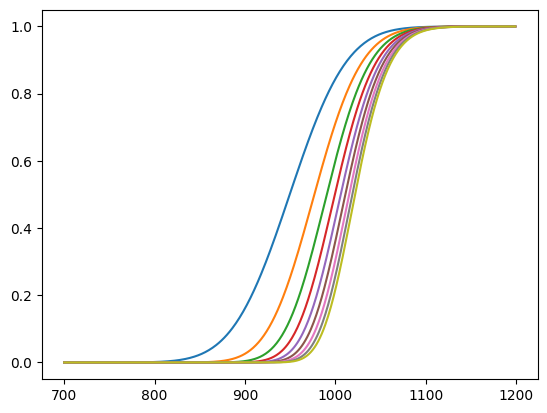

In [64]:
cdf = pmf.make_cdf()
for i in range(1, 10):
    max_cdf = cdf.max_dist(i) # or cdf ** i
    max_cdf.plot()
    print("heft " + str(i) + " loaves, prob < 1000 is ", max_cdf[1000])

<Axes: >

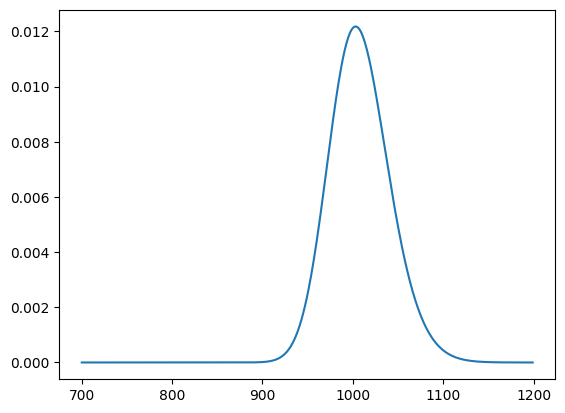

In [65]:
max_pmf = cdf.max_dist(5).make_pmf()
max_pmf.plot()

In [ ]:
# it doesn't look very skewed though.